In [12]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil #moving files form one to another
import glob
import tensorflow as tf

In [15]:
# counting the number of images in each folder
# 0 - Braintumor 1- Healthey
ROOT_DIR = 'Brain Tumor Data Set\Brain Tumor Data Set'
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('Brain Tumor', 2513), ('Healthy', 2087)])

In [16]:
len(os.listdir(ROOT_DIR))

2

# We will split the data set into
* 70% for training
* 15% for validation
* 15% for validation
    

In [10]:
#Creating a function for the splitting

def split_data(path,split):
    if not os.path.exists("./"+path):
        os.mkdir("./"+path)

    for dir in os.listdir(ROOT_DIR):
        os.makedirs("./"+path+"/"+ dir) #creating multiple folders
        
        for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)),size=(math.floor(split*number_of_images[dir])-5),replace=False):
            O = os.path.join(ROOT_DIR,dir,img)
            D = os.path.join("./"+path,dir)
            shutil.copy(O,D)
            os.remove(O)
    else:
        print(f"{path}folder already exists")


 

testfolder already exists


In [17]:
split_data("train",0.7)

trainfolder already exists


In [18]:
split_data("test",0.15)

testfolder already exists


In [19]:
split_data("val",0.15)

valfolder already exists


# Model building

In [36]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras

In [61]:
# CNN model

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))

model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25)) # Retain 75% of the data

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 110, 110, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
#compiling the model
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

Data preparation

In [67]:
def preProcessingImages1(path):
    '''
    input : Path
    output : Pre Processed Images
    '''
    

    image_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True) # Data Augmentation
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

    return image

In [68]:
path = "train"
train_data = preProcessingImages1(path)

Found 3209 images belonging to 2 classes.


In [69]:
def preProcessingImages2(path):
    '''
    input : Path
    output : Pre Processed Images
    '''
    

    image_data = ImageDataGenerator(rescale=1./255,)
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

    return image

In [70]:
path = "test"
test_data = preProcessingImages2(path)

Found 679 images belonging to 2 classes.


In [71]:
path = "val"
val_data = preProcessingImages2(path)

Found 679 images belonging to 2 classes.


In [77]:
# Early stopping and model checkpoint

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# early stopping

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=6, verbose=1, mode='auto')

# model checkpoint

mc = ModelCheckpoint(filepath= './bestmodel.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

cd = [es,mc]

# Model Training


In [79]:
hs = model.fit(train_data, steps_per_epoch=8, epochs=30, validation_data=val_data, validation_steps=16, callbacks=cd)


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 894ms/step - accuracy: 0.7707 - loss: 0.5131
Epoch 1: val_accuracy did not improve from 0.83234
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7724 - loss: 0.5095 - val_accuracy: 0.7070 - val_loss: 0.5184
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 867ms/step - accuracy: 0.7488 - loss: 0.5108
Epoch 2: val_accuracy did not improve from 0.83234
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7494 - loss: 0.5135 - val_accuracy: 0.7904 - val_loss: 0.5044
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 859ms/step - accuracy: 0.7876 - loss: 0.4588
Epoch 3: val_accuracy did not improve from 0.83234
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7865 - loss: 0.4624 - val_accuracy: 0.8164 - val_loss: 0.4253
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7256 - loss: 0.5876
Epoch 4: val_accuracy improved from 0.83234 to 0.85629, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7265 - loss: 0.5823 - val_accuracy:

In [82]:
# Graphical interpretation of the model

h = hs.history
h.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

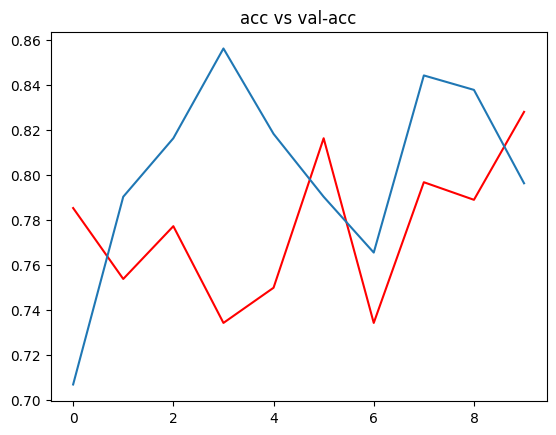

In [84]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'], c='red')
plt.plot(h['val_accuracy'])

plt.title("acc vs val-acc")
plt.show()

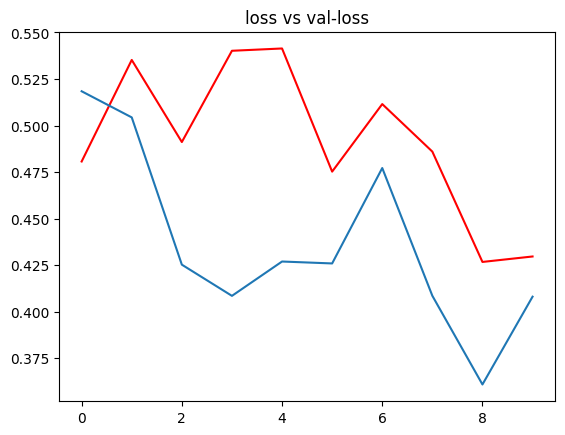

In [85]:
import matplotlib.pyplot as plt
plt.plot(h['loss'], c='red')
plt.plot(h['val_loss'])

plt.title("loss vs val-loss")
plt.show()

# Model Accuracy

In [86]:
from tensorflow.keras.models import load_model

model = load_model('bestmodel.keras')

In [88]:
# Model Accuracy

acc = model.evaluate(test_data)

print(f"The accuracy of the model is {acc[1]*100} %")

22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step - accuracy: 0.7957 - loss: 0.4409
The accuracy of the model is 80.85419535636902 %


In [91]:
from tensorflow.keras.utils import load_img, img_to_array

In [113]:
def inputImage(path):
    '''
    input : Path
    output : Image
    '''
    
    img = load_img(path, target_size=(224,224))
    input_arr = img_to_array(img)/255.0
    input_arr = np.expand_dims(input_arr, axis=0)

    plt.imshow(input_arr[0])
    plt.show()
    
    return input_arr

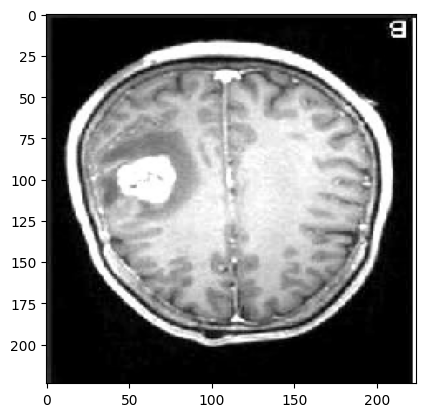

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
This MRI is a Brain Tumor


In [116]:
# path="Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (269).jpg"

# img = load_img(path, target_size=(224,224))
# input_arr = img_to_array(img)/255 # Normalization

# input_arr = np.expand_dims(input_arr, axis=0)
# plt.imshow(input_arr[0])
# plt.show()

prediction = model.predict(inputImage("Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1145).jpg"))[0][0]

if prediction < 0.5:
    print("This MRI is a Brain Tumor")
else:
    print("This MRI is Healthy")

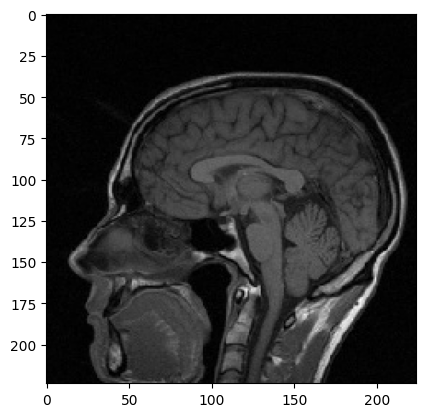

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
This MRI is a Brain Tumor


In [117]:
prediction = model.predict(inputImage("Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (417).jpg"))[0][0]

if prediction < 0.5:
    print("This MRI is a Brain Tumor")
else:
    print("This MRI is Healthy")